In [12]:
!pip install pandas scikit-learn tensorflow keras

In [16]:
import kagglehub


path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'news-headlines-dataset-for-sarcasm-detection' dataset.
Path to dataset files: /kaggle/input/news-headlines-dataset-for-sarcasm-detection


In [24]:
import pandas as pd
import os

# Load the correct JSON files from the dataset, assuming each line is a JSON object
df1 = pd.read_json(os.path.join(path, 'Sarcasm_Headlines_Dataset_v2.json'), lines=True)
df2 = pd.read_json(os.path.join(path, 'Sarcasm_Headlines_Dataset.json'), lines=True)

print("DataFrame 1 loaded with shape:", df1.shape)
print("DataFrame 2 loaded with shape:", df2.shape)

DataFrame 1 loaded with shape: (28619, 3)
DataFrame 2 loaded with shape: (26709, 3)


In [30]:
import re
import string

def clean_text(text):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df1['cleaned_text'] = df1['headline'].apply(clean_text)
df2['cleaned_text'] = df2['headline'].apply(clean_text)

In [28]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df1['cleaned_text'], df1['is_sarcastic'], test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(df2['cleaned_text'], df2['is_sarcastic'], test_size=0.2, random_state=42)

In [32]:
import re
import string

def clean_text(text):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df1['cleaned_text'] = df1['headline'].apply(clean_text)
df2['cleaned_text'] = df2['headline'].apply(clean_text)

In [33]:
import re
import string

def clean_text(text):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df1['cleaned_text'] = df1['headline'].apply(clean_text)
df2['cleaned_text'] = df2['headline'].apply(clean_text)

In [34]:
import re
import string

def clean_text(text):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df1['cleaned_text'] = df1['headline'].apply(clean_text)
df2['cleaned_text'] = df2['headline'].apply(clean_text)

In [35]:
import re
import string

def clean_text(text):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df1['cleaned_text'] = df1['headline'].apply(clean_text)
df2['cleaned_text'] = df2['headline'].apply(clean_text)

In [36]:
import re
import string

def clean_text(text):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df1['cleaned_text'] = df1['headline'].apply(clean_text)
df2['cleaned_text'] = df2['headline'].apply(clean_text)

In [37]:
import re
import string

def clean_text(text):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df1['cleaned_text'] = df1['headline'].apply(clean_text)
df2['cleaned_text'] = df2['headline'].apply(clean_text)

In [38]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df1['cleaned_text'], df1['is_sarcastic'], test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(df2['cleaned_text'], df2['is_sarcastic'], test_size=0.2, random_state=42)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline for Dataset 1
model_lr1 = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))), # Use unigrams and bigrams
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])

# Train and predict for Dataset 1
model_lr1.fit(X1_train, y1_train)
y1_pred_lr = model_lr1.predict(X1_test)

Accuracy for Dataset 1: 0.8297
Precision for Dataset 1: 0.8060
Recall for Dataset 1: 0.8465
F1-Score for Dataset 1: 0.8257

Classification Report for Dataset 1:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2995
           1       0.81      0.85      0.83      2729

    accuracy                           0.83      5724
   macro avg       0.83      0.83      0.83      5724
weighted avg       0.83      0.83      0.83      5724



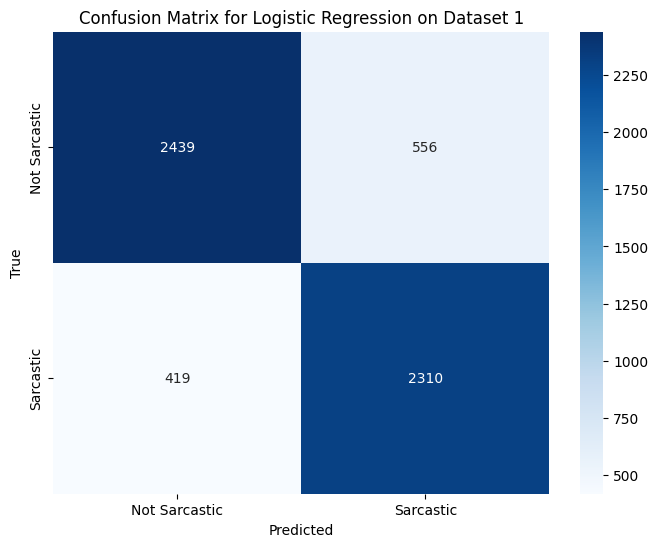

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate metrics for Dataset 1
accuracy = accuracy_score(y1_test, y1_pred_lr)
precision = precision_score(y1_test, y1_pred_lr)
recall = recall_score(y1_test, y1_pred_lr)
f1 = f1_score(y1_test, y1_pred_lr)

print(f"Accuracy for Dataset 1: {accuracy:.4f}")
print(f"Precision for Dataset 1: {precision:.4f}")
print(f"Recall for Dataset 1: {recall:.4f}")
print(f"F1-Score for Dataset 1: {f1:.4f}")

# Print classification report for Dataset 1
print("\nClassification Report for Dataset 1:")
print(classification_report(y1_test, y1_pred_lr))

# Generate confusion matrix for Dataset 1
cm = confusion_matrix(y1_test, y1_pred_lr)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression on Dataset 1')
plt.show()

Accuracy for Dataset 2: 0.8398
Precision for Dataset 2: 0.8314
Recall for Dataset 2: 0.7967
F1-Score for Dataset 2: 0.8137

Classification Report for Dataset 2:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2996
           1       0.83      0.80      0.81      2346

    accuracy                           0.84      5342
   macro avg       0.84      0.84      0.84      5342
weighted avg       0.84      0.84      0.84      5342



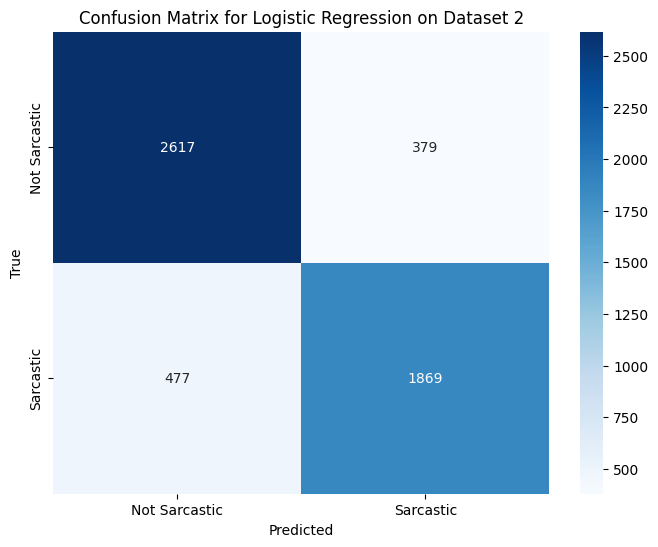

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pipeline for Dataset 2
model_lr2 = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))), # Use unigrams and bigrams
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])

# Train and predict for Dataset 2
model_lr2.fit(X2_train, y2_train)
y2_pred_lr = model_lr2.predict(X2_test)

# Calculate metrics for Dataset 2
accuracy_2 = accuracy_score(y2_test, y2_pred_lr)
precision_2 = precision_score(y2_test, y2_pred_lr)
recall_2 = recall_score(y2_test, y2_pred_lr)
f1_2 = f1_score(y2_test, y2_pred_lr)

print(f"Accuracy for Dataset 2: {accuracy_2:.4f}")
print(f"Precision for Dataset 2: {precision_2:.4f}")
print(f"Recall for Dataset 2: {recall_2:.4f}")
print(f"F1-Score for Dataset 2: {f1_2:.4f}")

# Print classification report for Dataset 2
print("\nClassification Report for Dataset 2:")
print(classification_report(y2_test, y2_pred_lr))

# Generate confusion matrix for Dataset 2
cm_2 = confusion_matrix(y2_test, y2_pred_lr)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression on Dataset 2')
plt.show()

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define parameters for tokenization and padding
max_words = 10000 # Consider the top 10,000 most frequent words
max_len = 100     # Pad sequences to a length of 100

# Initialize and fit tokenizer on training data
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X1_train)

# Convert text to sequences and pad them
X1_train_sequences = tokenizer.texts_to_sequences(X1_train)
X1_test_sequences = tokenizer.texts_to_sequences(X1_test)

X1_train_padded = pad_sequences(X1_train_sequences, maxlen=max_len, padding='post', truncating='post')
X1_test_padded = pad_sequences(X1_test_sequences, maxlen=max_len, padding='post', truncating='post')

print("Tokenization and padding completed for Dataset 1.")
print(f"Shape of X1_train_padded: {X1_train_padded.shape}")
print(f"Shape of X1_test_padded: {X1_test_padded.shape}")

Tokenization and padding completed for Dataset 1.
Shape of X1_train_padded: (22895, 100)
Shape of X1_test_padded: (5724, 100)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the LSTM model
embedding_dim = 128 # Dimension of the word embeddings

model_lstm1 = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model_lstm1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print(model_lstm1.summary())

# Train the LSTM model
history_lstm1 = model_lstm1.fit(X1_train_padded, y1_train,
                                epochs=5, # You can adjust the number of epochs
                                batch_size=32,
                                validation_data=(X1_test_padded, y1_test),
                                verbose=1)

print("LSTM model training completed for Dataset 1.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 127s 172ms/step - accuracy: 0.5173 - loss: 0.6930 - val_accuracy: 0.5232 - val_loss: 0.6921
Epoch 2/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 127s 178ms/step - accuracy: 0.5249 - loss: 0.6920 - val_accuracy: 0.5232 - val_loss: 0.6921
Epoch 3/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 126s 176ms/step - accuracy: 0.5239 - loss: 0.6921 - val_accuracy: 0.5232 - val_loss: 0.6923
Epoch 4/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 126s 176ms/step - accuracy: 0.5212 - loss: 0.6926 - val_accuracy: 0.5232 - val_loss: 0.6921
Epoch 5/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 125s 174ms/step - accuracy: 0.5229 - loss: 0.6922 - val_accuracy: 0.5232 - val_loss: 0.6921
LSTM model training completed for Dataset 1.
